<a href="https://colab.research.google.com/github/ps24601/Entity-Extraction/blob/master/notebooks/utils_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install package

In [ ]:
# linux packages
!wget --no-check-certificate https://dl.xpdfreader.com/xpdf-tools-linux-4.04.tar.gz
!tar -xvf xpdf-tools-linux-4.04.tar.gz && sudo cp xpdf-tools-linux-4.04/bin64/pdftotext /usr/local/bin
!apt-get install tesseract-ocr libtesseract-dev poppler-utils

# to use in/with streamlit sdk replace the 'streamlit' branch instead of  'main'
!pip install -e "git+https://github.com/gizdatalab/haystack_utils.git@main#egg=utils"

--2022-11-30 05:45:39--  https://dl.xpdfreader.com/xpdf-tools-linux-4.04.tar.gz
Resolving dl.xpdfreader.com (dl.xpdfreader.com)... 45.79.72.155
Connecting to dl.xpdfreader.com (dl.xpdfreader.com)|45.79.72.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23687259 (23M) [application/x-gzip]
Saving to: ‘xpdf-tools-linux-4.04.tar.gz.5’

xpdf-tools-linux-4. 100%[===================>]  22.59M  19.1MB/s    in 1.2s    

2022-11-30 05:45:41 (19.1 MB/s) - ‘xpdf-tools-linux-4.04.tar.gz.5’ saved [23687259/23687259]

xpdf-tools-linux-4.04/
xpdf-tools-linux-4.04/CHANGES
xpdf-tools-linux-4.04/COPYING3
xpdf-tools-linux-4.04/INSTALL
xpdf-tools-linux-4.04/ANNOUNCE
xpdf-tools-linux-4.04/bin64/
xpdf-tools-linux-4.04/bin64/pdftopng
xpdf-tools-linux-4.04/bin64/pdftohtml
xpdf-tools-linux-4.04/bin64/pdfinfo
xpdf-tools-linux-4.04/bin64/pdffonts
xpdf-tools-linux-4.04/bin64/pdfimages
xpdf-tools-linux-4.04/bin64/pdftotext
xpdf-tools-linux-4.04/bin64/pdftoppm
xpdf-tools-linux-4.04/bin6

###**Dont forget to Restart runtime**

# Read Files to work with

In [ ]:
# either connect Google drive to read the files or 
# upload the text/pdf/docx file to work with from colab UI.
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
%%writefile paramconfig.cfg

[lexical_search]
TOP_K = 20
SPLIT_BY = word
SPLIT_LENGTH = 120
SPLIT_OVERLAP = 0
REMOVE_PUNC = 0

[semantic_search]
RETRIEVER_TOP_K = 10
MAX_SEQ_LENGTH = 384
RETRIEVER = all-mpnet-base-v2
RETRIEVER_FORMAT = sentence_transformers
EMBEDDING_DIM = 768
RETRIEVER_EMB_LAYER = -1
READER = deepset/tinyroberta-squad2
READER_TOP_K = 10
READER_TOP_K_PER_CANDIDATE = 1
SPLIT_BY = word
SPLIT_LENGTH = 120
SPLIT_OVERLAP = 10
RESPECT_SENTENCE_BOUNDARY = 1
REMOVE_PUNC = 0

[sdg]
THRESHOLD = 0.85
MODEL = jonas/sdg_classifier_osdg
SPLIT_BY = word
REMOVE_PUNC = 0
SPLIT_LENGTH = 120
SPLIT_OVERLAP = 10
RESPECT_SENTENCE_BOUNDARY = 1
TOP_KEY = 15


[coherence]
RETRIEVER_TOP_K = 10
MAX_SEQ_LENGTH = 512
RETRIEVER = msmarco-distilbert-dot-v5
RETRIEVER_FORMAT = sentence_transformers
RETRIEVER_EMB_LAYER = -1
EMBEDDING_DIM = 768
THRESHOLD = 0.55
SPLIT_BY = word
SPLIT_LENGTH = 120
SPLIT_OVERLAP = 10
RESPECT_SENTENCE_BOUNDARY = 1
REMOVE_PUNC = 0

Writing paramconfig.cfg


## Read paramconfig file

In [ ]:
from utils.checkconfig import getconfig
config = getconfig('paramconfig.cfg')

# Utils

## Convertor > Preprocessor 


In [ ]:
import utils
from utils.preprocessing import processingpipeline
file_path = '/content/2011_Green Economy Strategy.pdf_ocr.txt'
file_name = 'test.txt'

In [ ]:
# reading the sdg params just for demo
split_by = config.get('sdg','SPLIT_BY')
split_length = int(config.get('sdg','SPLIT_LENGTH'))
split_overlap = int(config.get('sdg','SPLIT_OVERLAP'))
remove_punc = bool(int(config.get('sdg','REMOVE_PUNC')))
split_respect_sentence_boundary = bool(int(config.get('sdg','RESPECT_SENTENCE_BOUNDARY')))

In [ ]:
prep_pipeline  = processingpipeline()

output_pre = prep_pipeline.run(file_paths = file_path, 
                          params= {"FileConverter": {"file_path": file_path, \
                                      "file_name": file_name}, 
                                    "UdfPreProcessor": {"remove_punc": remove_punc, \
                                          "split_by": split_by, \
                                          "split_length":split_length,\
                                          "split_overlap": split_overlap, \
      "split_respect_sentence_boundary":split_respect_sentence_boundary}})
output_pre.keys()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Preprocessing:   0%|          | 0/1 [00:00<?, ?docs/s]

dict_keys(['documents', 'dataframe', 'text', 'paraList', 'root_node', 'params', 'file_paths', 'node_id'])

In [ ]:
haystack_doc = output_pre['documents']
haystack_doc[:3]

[<Document: {'content': '‘XN  Ethiopia’s Climate-Resilient Green Economy Green economy strategy  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA  CONFIDENTIAL  Contents  Foreword Ill Executive summary 1  The vision: Achieve middle-income status by 2025 ina climate-resilient green economy 5  The challenge: Realise economic development goals in a  sustainable way 11  The plan: Follow a green growth path that fosters development  and sustainability 19 The ambition is to build a green economy 19  The development of a green economy will be based on four pillars 20  Agriculture: Improving crop and livestock production practices for higher food security and farmer income while reducing emissions 22  Forestry: Protecting and re-establishing forests for their economic and ecosystem services, including as carbon stocks 24  Power: Expanding electricity generation form renewable energy for domestic and regional markets 25  Transport, industrial sectors and buildings: Leapfrogging to modern and energy effi

### Check params of UdfPreProcessor
UdfPreprocessor cannot be invoked on its own can be used only within the pipeline.\
To see more check the documentation of UdfPreprocessor.run()

In [ ]:
import inspect
from utils.preprocessing import UdfPreProcessor
print(inspect.getfullargspec(UdfPreProcessor.run))

FullArgSpec(args=['self', 'documents', 'remove_punc', 'split_by', 'split_length', 'split_respect_sentence_boundary', 'split_overlap'], varargs=None, varkw=None, defaults=(False, 'sentence', 2, False, 0), kwonlyargs=[], kwonlydefaults=None, annotations={'documents': typing.List[haystack.schema.Document], 'remove_punc': <class 'bool'>, 'split_by': typing_extensions.Literal['sentence', 'word'], 'split_length': <class 'int'>, 'split_respect_sentence_boundary': <class 'bool'>, 'split_overlap': <class 'int'>})


In [ ]:
# initialize the preprocessing pipeline and pass params for Preprocessor on go.

prep_pipeline  = processingpipeline()
output_pre = prep_pipeline.run(file_paths = file_path, 
                          params= {"FileConverter": {"file_path": file_path, \
                                        "file_name": file_name}, 
                                   "UdfPreProcessor": {"remove_punc": True, \
                                        "split_by": 'word', \
                                        "split_length":100,\
                                        "split_overlap": 0, \
                                        "split_respect_sentence_boundary":True}})

Preprocessing:   0%|          | 0/1 [00:00<?, ?docs/s]

In [ ]:
haystack_doc = output_pre['documents']
haystack_doc[:3]

[<Document: {'content': '‘XN  Ethiopia’s ClimateResilient Green Economy Green economy strategy  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA  CONFIDENTIAL  Contents  Foreword Ill Executive summary 1  The vision Achieve middleincome status by 2025 ina climateresilient green economy 5  The challenge Realise economic development goals in a  sustainable way 11  The plan Follow a green growth path that fosters development  and sustainability 19 The ambition is to build a green economy 19  The development of a green economy will be based on four pillars 20  Agriculture Improving crop and livestock production practices for higher food security and farmer income while reducing emissions 22  Forestry Protecting and reestablishing forests for their economic and ecosystem services including as carbon stocks 24  Power Expanding electricity generation form renewable energy for domestic and regional markets 25  Transport industrial sectors and buildings Leapfrogging to modern and energy efficient  Buildi

## SDG Classification

In [ ]:
model_name = config.get('sdg','MODEL')
split_by = config.get('sdg','SPLIT_BY')
split_length = int(config.get('sdg','SPLIT_LENGTH'))
split_overlap = int(config.get('sdg','SPLIT_OVERLAP'))
remove_punc = bool(int(config.get('sdg','REMOVE_PUNC')))
split_respect_sentence_boundary = bool(int(config.get('sdg','RESPECT_SENTENCE_BOUNDARY')))
threshold = float(config.get('sdg','THRESHOLD'))
top_n = int(config.get('sdg','TOP_KEY'))

In [ ]:
from utils.sdg_classifier import runSDGPreprocessingPipeline
file_path = '/content/2011_Green Economy Strategy.pdf_ocr.txt'
file_name = 'test.txt'
all_documents = runSDGPreprocessingPipeline(file_name= file_name,
                                        file_path= file_path, split_by= split_by,
                                        split_length= split_length,
                split_respect_sentence_boundary= split_respect_sentence_boundary,
                split_overlap= split_overlap, remove_punc= remove_punc)

Preprocessing:   0%|          | 0/1 [00:00<?, ?docs/s]

In [ ]:
from utils.sdg_classifier import sdg_classification,load_sdgClassifier
# loading requires either a filepath to valid config file or model name from HF=hub
classifier = load_sdgClassifier(config_file='paramconfig.cfg')
df, x = sdg_classification(haystack_doc=all_documents['documents'],
                          threshold= threshold, classifier_model=classifier)

Classifying documents:   0%|          | 0/160 [00:00<?, ?it/s]

In [ ]:
df.head()

,SDG,Relevancy,text
19,2,0.952317,Sustained high growth rates of the agricultural sector — the GTP projects mo...
45,2,0.853963,"To achieve middle-income status before 2025, these five-year growth rates mu..."
38,2,0.885061,This implies increasing crop productivity from 19 quintal per hectare to 22....
31,2,0.915749,"Between 2005 and 2010, the country’s real GDP grew by 11% p.a., with the ser..."
11,2,0.965132,The following sections give an overview of all four pillars. A detailed acco...


In [ ]:
x

,SDG,count,SDG_name,SDG_Num
0,7,20,SDG 7 - Affordable and clean energy,SDG 7
1,13,13,SDG 13 - Climate action,SDG 13
2,15,7,SDG 15 - Life on land,SDG 15
3,2,6,SDG 2 - Zero hunger,SDG 2
4,6,1,SDG 6 - Clean water and sanitation,SDG 6


### Keywords (TextRank)


([<matplotlib.patches.Wedge at 0x7f992c31f150>,
 [Text(4.556368295532246, 6.334620808552546, 'SDG 7'),
  Text(1.7904403149044175, 3.063065638371444, 'SDG 13'),
  Text(4.3991905146431485, 1.633431401159278, 'SDG 15'),
  Text(6.064963810934133, 2.776920092744395, 'SDG 2'),
  Text(6.39464051091093, 3.8396977121054157, 'SDG 6')])

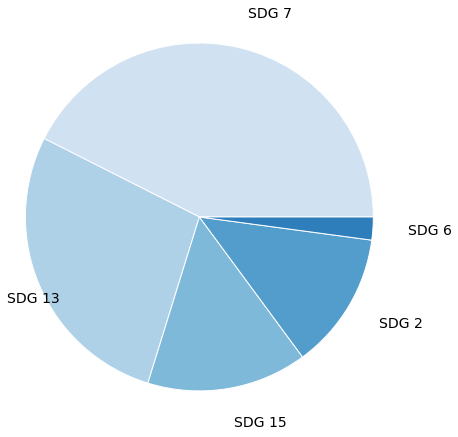

In [ ]:
from utils.keyword_extraction import textrank
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this part of code is from the SDSN repo meant for streamlit purpose.
# df = df.drop(['Relevancy'], axis = 1)
sdg_labels = x.SDG.unique()
textrank_keyword_list = []
for label in sdg_labels:
    sdgdata = " ".join(df[df.SDG == label].text.to_list())
    textranklist_ = textrank(textdata=sdgdata, words= top_n)
    if len(textranklist_) > 0:
        textrank_keyword_list.append({'SDG':label, 'TextRank Keywords':",".join(textranklist_)})
textrank_keywords_df = pd.DataFrame(textrank_keyword_list)


plt.rcParams['font.size'] = 25
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))
# plot
fig, ax = plt.subplots()
ax.pie(x['count'], colors=colors, radius=2, center=(4, 4),
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={'fontsize': 14}, 
    frame=False,labels =list(x.SDG_Num),
    labeldistance=1.2)

In [ ]:
textrank_keywords_df

,SDG,TextRank Keywords
0,7,"power,powering,emissions,emission,energies,energy efficient,efficiency,elect..."
1,13,"development,developing,develop,developed,emissions,initiatives,initial,initi..."
2,15,"forest,forests,increased,increasing,land increase,fuelwood,household,househo..."
3,2,"agriculture,agricultural sector,growth,increase,sectoral,gdp,products,produc..."
4,6,"growth,targets,funding,reach,projected,readily,available,country,expects,inf..."


## Search

### Lexical Search

In [ ]:
from utils.lexical_search import runLexicalPreprocessingPipeline

lexical_split_by= config.get('lexical_search','SPLIT_BY')
lexical_split_length=int(config.get('lexical_search','SPLIT_LENGTH'))
lexical_split_overlap = int(config.get('lexical_search','SPLIT_OVERLAP'))
lexical_remove_punc = bool(int(config.get('lexical_search','REMOVE_PUNC')))
lexical_top_k=int(config.get('lexical_search','TOP_K'))

In [ ]:
file_path = '/content/2011_Green Economy Strategy.pdf_ocr.txt'
file_name = 'test.txt'
all_documents = runLexicalPreprocessingPipeline(
                                    file_name=file_name,
                                    file_path=file_path,
                                    split_by=lexical_split_by,
                                    split_length=lexical_split_length,
                                    split_overlap=lexical_split_overlap,
                                    remove_punc=lexical_remove_punc)

Preprocessing:   0%|          | 0/1 [00:00<?, ?docs/s]

In [ ]:
from utils.lexical_search import lexical_search
queryList = "Water and energy"
lexical_search(query=queryList,
               documents = all_documents['documents'],
               top_k = lexical_top_k )

Top few lexical search (TFIDF) hits
Results 1
plan under development by the Ministry of Agriculture.  Forestry: Protecting and re-establishing forests for their economic and ecosystem services, including as carbon stocks  Deforestation and forest degradation must be reversed to support the continued provision of economic and ecosystem services and growth in GDP. Fuelwood accounts for more than 80% of households’energysupply today — particularly in tural areas. Furthermore, forests contribute an estimated 4% to GDP through the production of honey, forest coffee, and timber. They also provide significant and precious eco-system services: they protect soil andwaterresources by controlling the discharge ofwaterto streams and rivers, preserve biodiversity, function as a carbon sink, clean the air to create important health benefits, and boost land fertility.  Despite their economic and environmental value, Ethiopian forests are under threat. The growing population requires
Results 2
the vas

### Semantic Search



In [ ]:
split_by = config.get('semantic_search','SPLIT_BY')
split_length = int(config.get('semantic_search','SPLIT_LENGTH'))
split_overlap = int(config.get('semantic_search','SPLIT_OVERLAP'))
split_respect_sentence_boundary = bool(int(config.get('semantic_search',
                                    'RESPECT_SENTENCE_BOUNDARY')))

remove_punc = bool(int(config.get('semantic_search','REMOVE_PUNC')))
embedding_model = config.get('semantic_search','RETRIEVER')
embedding_model_format = config.get('semantic_search','RETRIEVER_FORMAT')
embedding_layer = int(config.get('semantic_search','RETRIEVER_EMB_LAYER'))
embedding_dim  = int(config.get('semantic_search','EMBEDDING_DIM'))
max_seq_len = int(config.get('semantic_search','MAX_SEQ_LENGTH')) 
retriever_top_k = int(config.get('semantic_search','RETRIEVER_TOP_K'))
reader_model = config.get('semantic_search','READER')
reader_top_k = int(config.get('semantic_search','RETRIEVER_TOP_K'))
top_k_per_candidate = int(config.get('semantic_search','READER_TOP_K_PER_CANDIDATE')) 

In [ ]:
from utils.semantic_search import runSemanticPreprocessingPipeline
all_documents = runSemanticPreprocessingPipeline(
                                            file_name= file_name,
                                            file_path= file_path,
                                            split_by=split_by,
                                            split_length= split_length,
                                            split_overlap=split_overlap,
                                            remove_punc= remove_punc,
                split_respect_sentence_boundary=split_respect_sentence_boundary)


Preprocessing:   0%|          | 0/1 [00:00<?, ?docs/s]

In [ ]:
from utils.semantic_search import semanticSearchPipeline
test_pipeline1, doc_store = semanticSearchPipeline(documents = all_documents['documents'],
                            embedding_model=embedding_model, 
                            embedding_layer=embedding_layer,
                            embedding_model_format=embedding_model_format,
                            reader_model=reader_model,reader_top_k=reader_top_k,
                            retriever_top_k=retriever_top_k, embedding_dim=embedding_dim,
                            max_seq_len=max_seq_len,
                            top_k_per_candidate = top_k_per_candidate)

Updating Embedding:   0%|          | 0/160 [00:00<?, ? docs/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

Documents Processed: 10000 docs [02:12, 75.24 docs/s]


In [ ]:
test_pipeline1.components

{'InMemoryDocumentStore': <haystack.document_stores.memory.InMemoryDocumentStore at 0x7f3ccb99be90>,
 'FARMReader': <haystack.nodes.reader.farm.FARMReader at 0x7f3ccb304390>,
 'EmbeddingRetriever': <haystack.nodes.retriever.dense.EmbeddingRetriever at 0x7f3ccb99b250>,
 'QueryCheck': <utils.semantic_search.QueryCheck at 0x7f3ccb304050>}

In [ ]:
from utils.semantic_search import runSemanticPipeline
query = "water"
queries = ["water","gender equality"]
single_query_result = runSemanticPipeline(pipeline= test_pipeline1, queries = query)
multi_query_result = runSemanticPipeline(pipeline= test_pipeline1, queries = queries)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Inferencing Samples: 100%|██████████| 1/1 [00:06<00:00,  6.19s/ Batches]
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Querying:   0%|          | 0/2 [00:00<?, ?it/s]

Inferencing Samples: 100%|██████████| 1/1 [00:10<00:00, 10.61s/ Batches]


In [ ]:
from utils.semantic_search import process_semantic_output
single_query_df  = process_semantic_output(single_query_result)
single_query_df

,query,answer,answer_offset,context_offset,context,content,reader_score,retriever_score,id
0,what are the water related issues and discussions?,climate change,"[136, 150]","[68, 218]",e realise the need for immediate and effective action to respond to climate ...,THE AMBITION IS TO BUILD A GREEN ECONOMY Political leaders worldwide realis...,0.000247,0.500960,13e697f327910b8f4d8abba9d45b4828
1,what are the water related issues and discussions?,climate change,"[89, 103]","[21, 171]",re of the important role that developing countries play in fighting climate ...,The government is aware of the important role that developing countries play...,0.000979,0.500929,c5b318db8e8f5e69d76889dbb5070b22
2,what are the water related issues and discussions?,climate resilience,"[28, 46]","[0, 150]","The document does not cover climate resilience, which will be added over the...","The document does not cover climate resilience, which will be added over the...",0.002780,0.500910,17518763f8eafc31144778050d77431e
3,what are the water related issues and discussions?,environmental laws,"[59, 77]","[0, 150]",Building a ‘Green Econ- omy’ and ongoing implementation of environmental law...,Building a ‘Green Econ- omy’ and ongoing implementation of environmental law...,0.008384,0.500910,5709b9c058d49cea364c7634a2a30ef1
4,what are the water related issues and discussions?,climate change,"[623, 637]","[488, 638]",HE AMBITION IS TO BUILD A GREEN ECONOMY Political leaders worldwide realise...,"It has consequently outlined a strategy to build this green economy. So far,...",0.009588,0.500901,93734d52d898ed2862ecbf3f9cc32d7b
5,what are the water related issues and discussions?,hydropower potential,"[121, 141]","[56, 206]",r initiatives for fast-track implementation: exploiting the vast hydropower ...,"As part of the strategy, the government has selected four initiatives for fa...",0.051074,0.500899,5c1c0c05ac5559fdfae7fa951f3a3057
6,what are the water related issues and discussions?,CRGE initiative as well as the outcome of the consultation process.,"[39, 106]","[0, 150]",This document reflects the work of the CRGE initiative as well as the outcom...,This document reflects the work of the CRGE initiative as well as the outcom...,0.002357,0.500892,7968a41f74f44db66d01502a72027577
7,what are the water related issues and discussions?,environmental services to the world. Bi- and multilateral development partne...,"[223, 722]","[222, 722]",environmental services to the world. Bi- and multilateral development partn...,We are dedicating significant resources to building our green economy. To ca...,0.000379,0.500892,1244d70e2b0ca2da254adb842325a85e
8,what are the water related issues and discussions?,hydropower potential,"[696, 716]","[631, 781]",r initiatives for fast-track implementation: exploiting the vast hydropower ...,1 usp 15 per t roughly equals the price of carbon credits under the European...,0.054129,0.500891,958fbcb7ed121ef58fa9a441c28269d9
9,what are the water related issues and discussions?,better air and water quality,"[373, 401]","[312, 462]","nefits. For example, it would improve public health, through better air and ...",Building the green economy requires an estimated total expenditure of around...,0.004346,0.500890,30e753c6e22ee96daff5d0035816ab8f
